In [1]:
import os,sys
sys.path.append('..')

In [2]:
from cartesian_genetics_base.cartesian_genome_func import CartesianGenomeFunc

In [3]:
from sklearn.datasets import load_iris,load_digits

In [4]:
iris = load_digits()

In [5]:
data,target = iris['data'],iris['target']

In [6]:
from sklearn.metrics import mean_absolute_error

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

data,target = shuffle(data,target,random_state=1)
data = StandardScaler().fit_transform(data)

X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.33,random_state=42)

In [8]:
import random

def get_mutated_samples(in_sample,n_points=1,new_samples_count=10):
    while new_samples_count!=0:
        points_to_do = n_points
        new_sample = [v for v in in_sample]
        while points_to_do>0:
            mutate_point = random.choice([i for i in range(len(in_sample))])
            new_sample = [v if i!=mutate_point else random.random() for i,v in enumerate(new_sample)]
            points_to_do-=1
        yield new_sample
        new_samples_count-=1

In [9]:
import math

# def sqrt(x):
#     return math.sqrt(abs(x))

def log(x):
    return math.log(abs(x+0.00001))

def summ(x,y):
    return x+y

# def diff(x,y):
#     return x-y

def neg(x):
    return -x

def mult(x,y):
    return x*y

def maxx(x,y):
    return max(x,y)

def minn(x,y):
    return min(x,y)

def iden(x):
    return x

basis = [log,neg,summ,mult,maxx,minn,iden]
#basis = [sqrt,log,neg,summ,mult,maxx,minn,iden,diff]

In [10]:
from tqdm import tqdm_notebook

gen_and_score = dict()

for rec_depth in [1,2,3]:
    gen_and_score[rec_depth] = list()
    cgf = CartesianGenomeFunc(basis_funcs=basis,
                              n_inputs=data.shape[1],
                              n_outputs=1,
                              depth=5,
                              recurse_depth=rec_depth,
                              seed=rec_depth,
                              n_rows=2)

    cgf.init_random_genome()
    

    n_generations = 150
    n_samples_in_gen = 25
    mut_points = 3

    preds = [cgf.call(x) for x in X_train]
    top_score = mean_absolute_error(preds,y_train)
    top_genome = cgf.get_genome()

    for i in tqdm_notebook(range(n_generations)):
        for new_sample in get_mutated_samples(top_genome,n_points=mut_points,new_samples_count=n_samples_in_gen):
            cgf.set_genome(new_sample)
            new_preds = [cgf.call(x) for x in X_train]
            new_score = mean_absolute_error(new_preds,y_train)
            if new_score<top_score:
                print('new score in gen:',i,new_score)
                top_score = new_score
                top_genome = cgf.get_genome()
        gen_and_score[rec_depth].append((i,top_score))

new score in gen: 0 4.409343410662213
new score in gen: 0 2.673004540190038


KeyboardInterrupt: 

## Now lets try out vector representation

In [11]:
import math
import numpy as np


def sqrt(x):
    return np.sqrt(np.abs(x))

def log(x):
    return np.log(np.abs(x+0.00001))
    
def summ(x,y):
    return x+y
    
def diff(x,y):
    return x-y


def div(x,y):
    return x/(y+0.1)

def neg(x):
    return -x

def mult(x,y):
    return x*y
    

# def mult_3(x,y,z):
#     return x*y*z
    
# def maxx(x,y):
#     return np.maximum(x,y)

# def minn(x,y):
#     return np.minimum(x,y)

def div_2(x):
    return x/2

def mult_3(x):
    return x*3

# def ceil(x):
#     return np.ceil(x)

def abss(x):
    return np.abs(x)

# def iden(x):
#     return x

# def sigm(x):
#     return 1/(1+np.exp(-x))

basis = [sqrt,log,neg,summ,mult,div,abss,div_2,mult_3,diff]
#basis = [sqrt,log,neg,summ,mult,maxx,minn,iden,diff]

([array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]),
  array([0., 0., 0., 0., 0., 0.

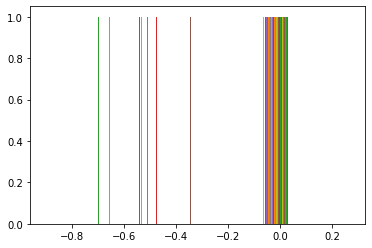

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.hist(preds)

(array([117., 124., 123., 126., 124., 119., 107., 123., 118., 122.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

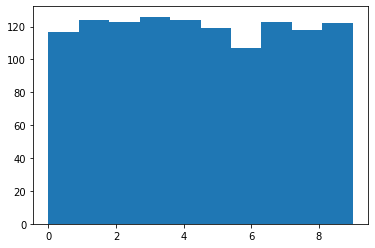

In [13]:
plt.hist(y_train)

In [14]:
from tqdm import tqdm_notebook

gen_and_score = dict()

already_scored_cgp = dict()

for rec_depth in [9,]:
    gen_and_score[rec_depth] = list()
    cgf = CartesianGenomeFunc(basis_funcs=basis,
                              n_inputs=data.shape[1],
                              n_outputs=1,
                              depth=36,
                              recurse_depth=rec_depth,
                              seed=rec_depth,
                              n_rows=1)

    cgf.init_random_genome()
    
    n_generations = 150
    n_samples_in_gen = 50
    mut_points = 3
    get_top_n = 9

    preds = cgf.call([X_train[:,i] for i in range(X_train.shape[1])])[0]
    top_2_scores = [mean_absolute_error(preds,y_train) for p in range(get_top_n)]
    top_2_genomes = [cgf.get_genome() for p in range(get_top_n)]

    
    last_best = top_2_scores[-1]
    for i in tqdm_notebook(range(n_generations)):
        for pair in zip(*[get_mutated_samples(top_2_genomes[_i_],n_points=mut_points,new_samples_count=n_samples_in_gen)
                        for _i_ in range(len(top_2_genomes))]):
            
            for new_sample in pair:
                if tuple(new_sample) in already_scored_cgp:
                    continue
                already_scored_cgp[tuple(new_sample)] = 1
                cgf.set_genome(new_sample)
                new_preds = cgf.call([X_train[:,i] for i in range(X_train.shape[1])])[0]
                new_score = mean_absolute_error(new_preds,y_train)
                
                last_bigger = None
                already_in = False
                for i_,old_score in enumerate(top_2_scores):
                    if new_score<=old_score:
                        last_bigger = i_
#                     if old_score==new_score:
#                         already_in = True
                
                if (last_bigger is not None) and not already_in:
                    top_2_scores[last_bigger] = new_score
                    top_2_genomes[last_bigger] = cgf.get_genome()
                    
                    if last_best>top_2_scores[-1]:
                        last_best = top_2_scores[-1]
                        print('new score in gen:',i,new_score)
                        test_preds = cgf.call([X_test[:,i] for i in range(X_test.shape[1])])[0]
                        new_test_score = mean_absolute_error(test_preds,y_test)

                        print('new test score in gen:',i,new_test_score)
                        print('top_scores:',top_2_scores,'\n')

        gen_and_score[rec_depth].append((i,top_score))

new score in gen: 0 3.6273596679138316
new test score in gen: 0 3.659760728489831
top_scores: [4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 3.6273596679138316] 

new score in gen: 0 3.0915786137394115
new test score in gen: 0 3.195964948580028
top_scores: [4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.2720037667673045, 4.079781978750553, 4.062843994118533, 3.0915786137394115] 

new score in gen: 1 2.904225018419754
new test score in gen: 1 2.9530739176450798
top_scores: [4.018752716956991, 3.936211592029421, 3.5215069103798506, 3.446395158279351, 3.438532307789703, 3.431994197502156, 3.260661277544708, 3.120411331500614, 2.904225018419754] 

new score in gen: 1 2.85297067057998
new test score in gen: 1 3.014579933263616
top_scores: [3.957619412209777, 3.852850267348831, 3.5215069103798506, 3.446395158279351, 3.4319941

new score in gen: 29 2.140986697879139
new test score in gen: 29 2.0990616958572152
top_scores: [2.184964473741521, 2.1778586379819194, 2.168463240756453, 2.166896535317857, 2.1641190434328395, 2.153000606771003, 2.151145800906735, 2.1487096444335143, 2.140986697879139] 

new score in gen: 31 2.097926580003827
new test score in gen: 31 2.039808168532296
top_scores: [2.16541422753409, 2.1641190434328395, 2.155772099715671, 2.1497614125809177, 2.1488314203616623, 2.1487096444335143, 2.14498472082398, 2.142588481910099, 2.097926580003827] 

new score in gen: 34 2.097615691034748
new test score in gen: 34 2.08198325607872
top_scores: [2.1488314203616623, 2.1487096444335143, 2.14498472082398, 2.1425589836402152, 2.140986697879139, 2.1390028979062587, 2.130523680117059, 2.108955721725302, 2.097615691034748] 

new score in gen: 37 2.0643071677269966
new test score in gen: 37 2.0252778013266255
top_scores: [2.118238416834892, 2.1163543538505247, 2.1098640590466564, 2.10720650856328, 2.10296129

new score in gen: 116 1.7550526071425592
new test score in gen: 116 1.8497999467941364
top_scores: [1.78715731233064, 1.7860639370005942, 1.7860346672932255, 1.786034659689889, 1.781325745928456, 1.7732067571174455, 1.7687313151417012, 1.766689429029696, 1.7550526071425592] 

new score in gen: 118 1.7550526055801845
new test score in gen: 118 1.8497999515437658
top_scores: [1.786034659689889, 1.781325745928456, 1.7782766161108194, 1.7732067571174455, 1.7722404446526785, 1.768626534030175, 1.766689429029696, 1.761286042005532, 1.7550526055801845] 

new score in gen: 118 1.7400858397916987
new test score in gen: 118 1.8406466692389198
top_scores: [1.786034659689889, 1.781325745928456, 1.7782766161108194, 1.7732067571174455, 1.7722404446526785, 1.766689429029696, 1.761286042005532, 1.7550526071425592, 1.7400858397916987] 

new score in gen: 120 1.7358809540891758
new test score in gen: 120 1.850823394145419
top_scores: [1.7736468532156129, 1.7732067571174455, 1.7666894277303422, 1.7665632

(array([  9.,  24.,  47.,  63., 175., 264., 278., 239.,  90.,  14.]),
 array([-3.04394916, -1.83439367, -0.62483818,  0.5847173 ,  1.79427279,
         3.00382828,  4.21338376,  5.42293925,  6.63249473,  7.84205022,
         9.05160571]),
 <a list of 10 Patch objects>)

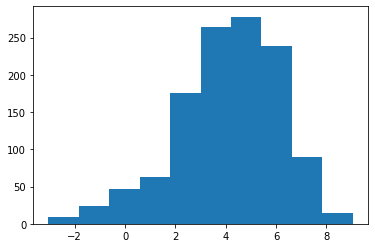

In [463]:
cgf.set_genome(top_2_genomes[-1])
new_preds = cgf.call([X_train[:,i] for i in range(X_train.shape[1])])[0]

plt.hist(new_preds)

In [464]:
mean_absolute_error(np.ceil(new_preds),y_train)

1.8013300083125519

In [465]:
new_preds

array([ 5.73385083,  4.55472865,  6.33784257, ...,  2.22083824,
       -0.46699968,  2.84568311])

In [466]:
y_train

array([7, 7, 9, ..., 8, 0, 7])

In [467]:
from sklearn.ensemble import RandomForestClassifier

In [468]:
rfc = RandomForestClassifier(random_state=42,n_estimators=100,max_depth=10)

rfc.fit(X_train,y_train)
preds = rfc.predict(X_test)
mean_absolute_error(preds,y_test)

0.08922558922558922

In [469]:
mean_absolute_error(rfc.predict(X_train),y_train)

0.0

(array([54., 66., 58., 57., 75., 61., 55., 57., 55., 56.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

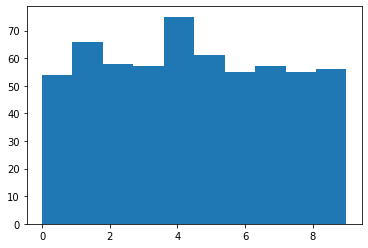

In [470]:
plt.hist(preds)